# Project 2
## Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment
## About the Dataset
### The ultimate Soccer database for data analysis and machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch.
*  +25,000 matches
*  +10,000 players
*  11 European Countries with their lead championship
*  Seasons 2008 to 2016
*  Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
*  Team line up with squad formation (X, Y coordinates)
*  Betting odds from up to 10 providers
*  Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

In [1]:
# Import the libraries
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [48]:
# Create connection and read data into pandas from database.sqlite
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", cnx)

In [3]:
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [4]:
df.shape, df.head(),df.columns

((183978, 42),
    id  player_fifa_api_id  player_api_id                 date  overall_rating  \
 0   1              218353         505942  2016-02-18 00:00:00            67.0   
 1   2              218353         505942  2015-11-19 00:00:00            67.0   
 2   3              218353         505942  2015-09-21 00:00:00            62.0   
 3   4              218353         505942  2015-03-20 00:00:00            61.0   
 4   5              218353         505942  2007-02-22 00:00:00            61.0   
 
    potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
 0       71.0          right              medium              medium      49.0   
 1       71.0          right              medium              medium      49.0   
 2       66.0          right              medium              medium      49.0   
 3       65.0          right              medium              medium      48.0   
 4       65.0          right              medium              medium      48.0   

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [49]:
# Check for Null data and count for same. Also, we will drop out the columns with object dtype
df = df.select_dtypes(["int64","float64"])
df.isnull().sum(axis=0)

id                       0
player_fifa_api_id       0
player_api_id            0
overall_rating         836
potential              836
crossing               836
finishing              836
heading_accuracy       836
short_passing          836
volleys               2713
dribbling              836
curve                 2713
free_kick_accuracy     836
long_passing           836
ball_control           836
acceleration           836
sprint_speed           836
agility               2713
reactions              836
balance               2713
shot_power             836
jumping               2713
stamina                836
strength               836
long_shots             836
aggression             836
interceptions          836
positioning            836
vision                2713
penalties              836
marking                836
standing_tackle        836
sliding_tackle        2713
gk_diving              836
gk_handling            836
gk_kicking             836
gk_positioning         836
g

In [51]:
#Lets drop the null values
df=df.dropna()
df.shape

(181265, 38)

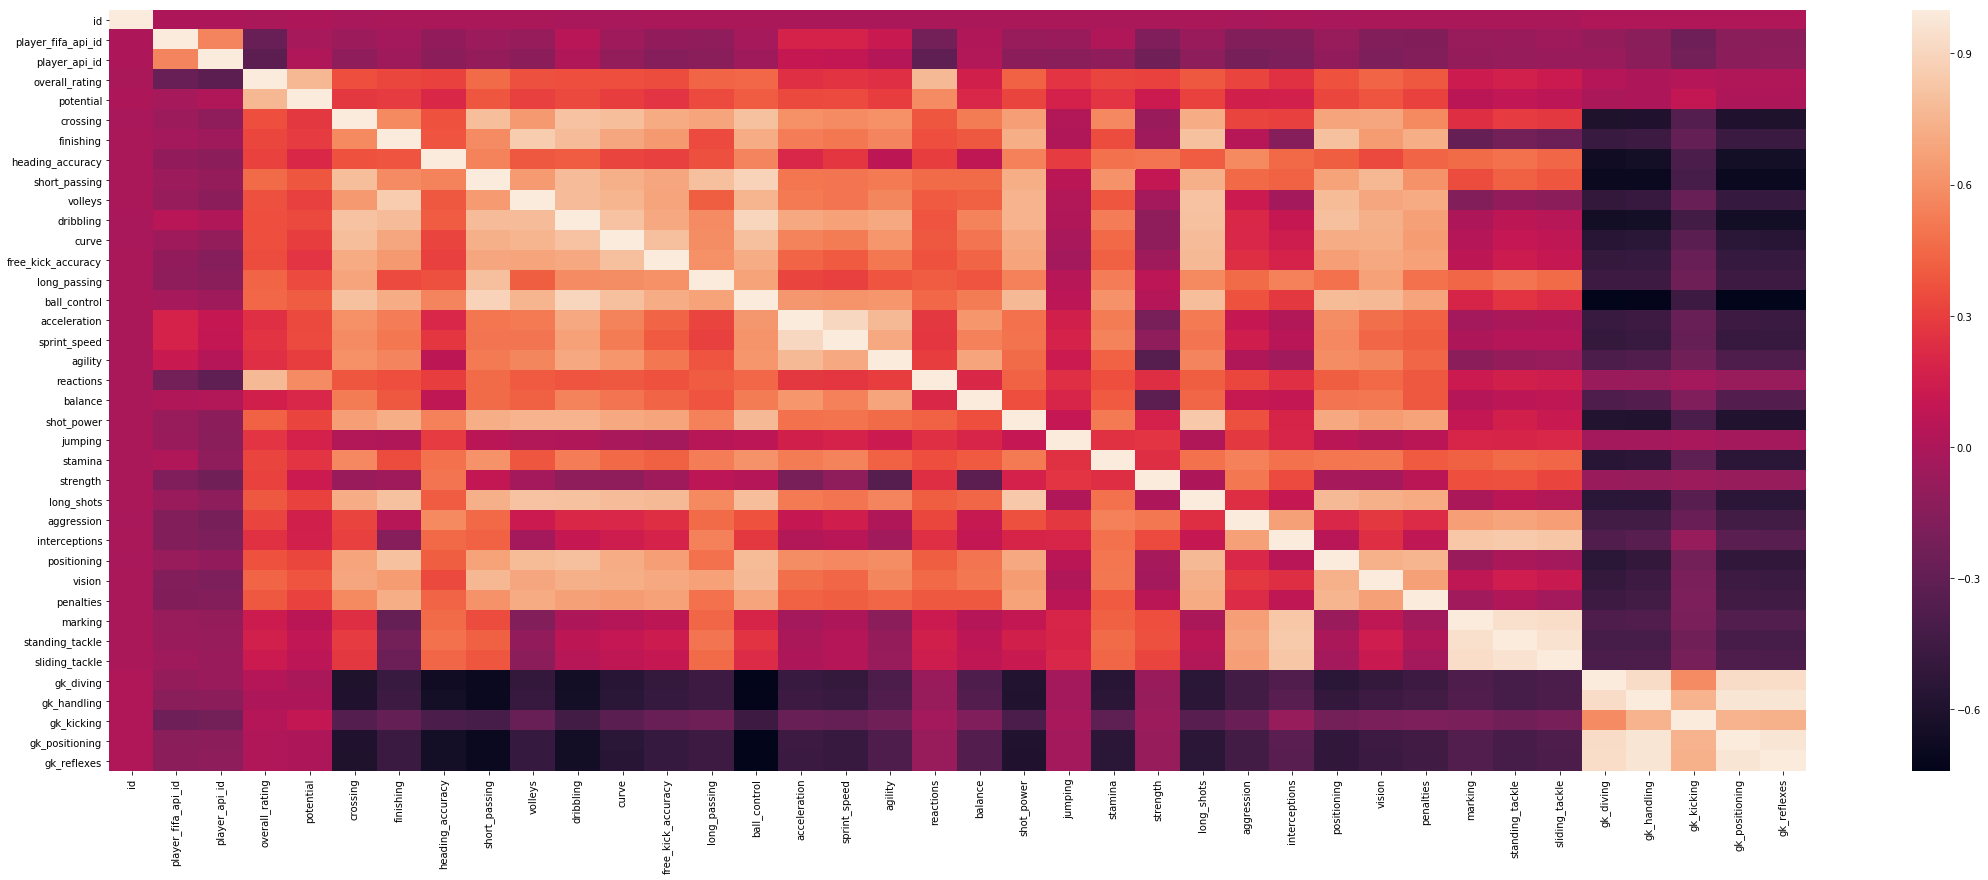

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(38,14))
sns.heatmap(df.corr())

In [53]:
# Get the correlation matrix w.r.t overall_rating which we want to predict
corr_mat  = df.corr()
corr_mat["overall_rating"].sort_values(ascending=False)

overall_rating        1.000000
reactions             0.770963
potential             0.765674
short_passing         0.458122
ball_control          0.444183
long_passing          0.434789
vision                0.431137
shot_power            0.427842
penalties             0.392717
long_shots            0.392660
positioning           0.369469
volleys               0.361470
curve                 0.357772
crossing              0.357655
dribbling             0.354369
free_kick_accuracy    0.349931
finishing             0.330116
stamina               0.326114
aggression            0.323084
strength              0.316421
heading_accuracy      0.313541
jumping               0.259023
sprint_speed          0.253333
interceptions         0.249475
acceleration          0.244180
agility               0.239896
standing_tackle       0.164780
balance               0.160364
marking               0.132857
sliding_tackle        0.128889
gk_kicking            0.028156
gk_diving             0.027215
gk_posit

In [13]:
# We will select only the features we like to have as per above correlations.
features=['reactions','potential','short_passing','ball_control','long_passing',
          'vision','shot_power','penalties','long_shots','positioning','volleys',
          'curve','crossing','dribbling','free_kick_accuracy','finishing','stamina',
          'aggression','strength','heading_accuracy','jumping','sprint_speed',
          'interceptions','acceleration','agility','standing_tackle','balance',
          'marking','sliding_tackle']

In [54]:
# We will try to fit via Linear correlation
x=df[features]
y=df['overall_rating']
lm=LinearRegression(n_jobs=10)
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [55]:
# print intercept and coefficients and score
print(lm.intercept_)
print(features,lm.coef_)
print('Prediction accuracy: {}%'.format(lm.score(x,y)*100))

1.5771856731704759
['reactions', 'potential', 'short_passing', 'ball_control', 'long_passing', 'vision', 'shot_power', 'penalties', 'long_shots', 'positioning', 'volleys', 'curve', 'crossing', 'dribbling', 'free_kick_accuracy', 'finishing', 'stamina', 'aggression', 'strength', 'heading_accuracy', 'jumping', 'sprint_speed', 'interceptions', 'acceleration', 'agility', 'standing_tackle', 'balance', 'marking', 'sliding_tackle'] [ 3.06409101e-01  5.09354062e-01  8.83551089e-04  2.03427432e-02
  4.74691311e-02 -4.84126774e-03  1.53657980e-02  1.45147362e-02
 -4.10816926e-03 -1.55762917e-02 -2.84931207e-04  3.77926148e-03
  3.81465370e-02 -1.76271201e-02  5.44014161e-03  1.51810233e-03
 -1.21415411e-02  1.16928654e-02  9.00985402e-02 -1.76505582e-02
  4.55451079e-02 -2.20305733e-02 -1.17483756e-03 -1.90168385e-02
 -2.71169871e-03 -7.36788093e-04 -4.54459922e-03  1.88086630e-02
 -4.57866504e-02]
Prediction accuracy: 78.89251624235327%


In [62]:
#Let's try to check actual and predicted ratings from model
y_pred=lm.predict(x)
pred=pd.DataFrame(y.values,columns=['Actual_rating'])
pred['Predicted_rating']=y_pred
pred.head(10)

,Actual_rating,Predicted_rating
0,67.0,61.407952
1,67.0,61.407952
2,62.0,58.803919
3,61.0,57.973411
4,61.0,57.973411
5,74.0,70.076867
6,74.0,70.087363
7,73.0,69.547358
8,73.0,69.549948
9,73.0,69.549948


In [64]:
# Error Rate of the LM Regression Model
print("Error Rate of the LM Regression Model : ",sqrt(mean_squared_error(y_pred,y)))

Error Rate of the LM Regression Model :  3.2297044010403337


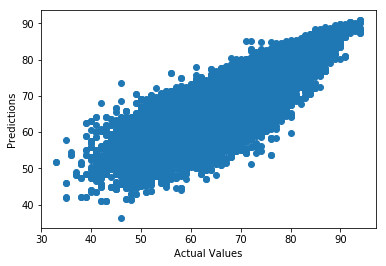

In [57]:
#Lets plot actual vs predicted as scatter
plt.scatter(pred.Actual_rating, pred.Predicted_rating)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

In [81]:
# Lets try by splitting the data using train-test method.
#spliting 65% for train data and 35% for test data.
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.35,random_state=0)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)

X_train Shape :  (117822, 29)
X_test Shape :  (63443, 29)
Y_train Shape :  (117822,)
Y_test.shape :  (63443,)


In [82]:
#Train the data
lm_split=LinearRegression(n_jobs=10)
lm_split.fit(X_train,Y_train)
print('Prediction accuracy: {}%'.format(lm.score(X_train, Y_train)*100))

Prediction accuracy: 78.89101596361515%


In [83]:
# predict on test data
Y_pred_split = lm_split.predict(X_test)
test_pred=pd.DataFrame(Y_test.values,columns=['Actual_rating'])
test_pred['Predicted_rating']=Y_pred_split
pred.head(10)

,Actual_rating,Predicted_rating
0,67.0,61.407952
1,67.0,61.407952
2,62.0,58.803919
3,61.0,57.973411
4,61.0,57.973411
5,74.0,70.076867
6,74.0,70.087363
7,73.0,69.547358
8,73.0,69.549948
9,73.0,69.549948


In [88]:
# Error Rate of the LM split Regression Model
print("Error Rate of the LM split Regression Model : ",sqrt(mean_squared_error(Y_pred_split,Y_test)))

Error Rate of the LM split Regression Model :  3.222539722924974


In [91]:
#Lets try to use RFE to use feature selection
from sklearn.feature_selection import RFE
df_new=df.copy()
df_new=df_new.drop('overall_rating',axis=1)
lmf = LinearRegression(n_jobs=10)
rfe = RFE(lmf, n_features_to_select = 15)

x=df_new
y=df['overall_rating']
rfe_fit = rfe.fit(x, y)
features_new = []
for feat in df_new.columns[rfe_fit.support_]:
    print(feat)
    features_new.append(feat)

potential
crossing
heading_accuracy
short_passing
ball_control
reactions
strength
aggression
marking
sliding_tackle
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes


In [92]:
#try linear regression using new features
x_new=df[features_new]
y_new=df['overall_rating']
Xn_train,Xn_test,Yn_train,Yn_test = train_test_split(x_new,y_new,test_size=0.3,random_state=0)
print("Xn_train Shape : ",Xn_train.shape)
print("Xn_test Shape : ",Xn_test.shape)
print("Yn_train Shape : ",Yn_train.shape)
print("Yn_test.shape : ",Yn_test.shape)

Xn_train Shape :  (126885, 15)
Xn_test Shape :  (54380, 15)
Yn_train Shape :  (126885,)
Yn_test.shape :  (54380,)


In [93]:
#Train the data
lmf.fit(Xn_train,Yn_train)
print('Prediction accuracy: {}%'.format(lmf.score(Xn_train, Yn_train)*100))

Prediction accuracy: 83.81319790711287%


In [102]:
#Predict on test dataset and then check the error score
yn_pred = lmf.predict(Xn_test)

In [104]:
print("Error Rate of the LM Regression Model for new features : ",sqrt(mean_squared_error(yn_pred,Yn_test)))

Error Rate of the LM Regression Model for new features :  2.8285286324300736


In [105]:
new_pred=pd.DataFrame(Yn_test.values,columns=['Actual_rating'])
new_pred['Predicted_rating']=yn_pred
new_pred.head(10)

,Actual_rating,Predicted_rating
0,67.0,70.620143
1,56.0,59.700633
2,69.0,68.533972
3,79.0,80.130245
4,69.0,63.812105
5,73.0,71.287132
6,77.0,72.989617
7,64.0,64.838364
8,81.0,86.056354
9,63.0,63.351631


In [94]:
# Let try using decision tree regression on new split data
regressor  = DecisionTreeRegressor(max_depth=20)
regressor.fit(Xn_train,Yn_train)
print('Variance Score: {}'.format(regressor.score(Xn_train,Yn_train)))

Variance Score: 0.9930044684324683


In [96]:
#Let's try to check actual and predicted ratings from decision tree model
y_dt_pred=regressor.predict(Xn_test)
dt_pred=pd.DataFrame(Yn_test.values,columns=['Actual_rating'])
dt_pred['Predicted_rating']=y_dt_pred
dt_pred.head(10)

,Actual_rating,Predicted_rating
0,67.0,72.625000
1,56.0,55.300000
2,69.0,68.000000
3,79.0,79.000000
4,69.0,69.000000
5,73.0,72.589286
6,77.0,76.000000
7,64.0,64.000000
8,81.0,80.000000
9,63.0,62.000000


In [97]:
# Error Rate of the DT Regression Model
print("Error Rate of the DT Regression Model : ",sqrt(mean_squared_error(y_dt_pred,Yn_test)))

Error Rate of the DT Regression Model :  1.6080409535159006


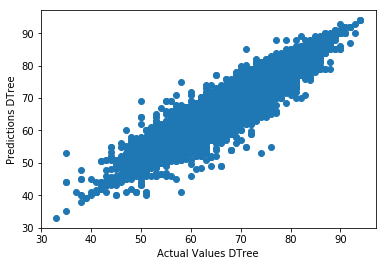

In [101]:
#Lets plot actual vs predicted as scatter
plt.scatter(dt_pred.Actual_rating, dt_pred.Predicted_rating)
plt.xlabel('Actual Values DTree')
plt.ylabel('Predictions DTree')
plt.show()